# Problem Set \#2
## Question 2)
This question consists of making various plots and derivations related to specific intensity of a blackbody (i.e. intensity per unit wavelength or per unit frequency). Thus, to accomplish this we create a class called BlackBody that has a single instance attribute, namely the Temperature T given in Kelvins. A few class attributes are created as well, namely we create arrays for our frequency and wavelength values each over their given ranges (default to ranges given in a) and b) ) and incremented in a chosen step size for each respectively (default to 1nm and 1THz). We chose this (i.e. np.arange) over np.linspace as it makes computing derivatives more straight forward. We store the specific intensities (one for frequncy one for wavelength) as lambda functions (as they only have one expression) using the numpy version of the exponential function to avoid needing to vectorize these. We add utility methods to help us make plots and compute the derivatives of these specific intensities. 

In [726]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
import scipy.constants as csnt

plt.style.use('seaborn')
from matplotlib import rc
rc('text', usetex=True)


class BlackBody():
    def __init__(self, T, lrange = (0.1e-6,2e-6), lstep = 1e-9, nstep = 1e12, nrange = (15e12,3000e12)):
        #temperature of BB-radiator
        self.T = T
        self.name = str(self)

        #range of wavelengths spaced by 1nm increments
        lrange = lrange
        self.lstep = lstep
        self.ls = np.arange(lrange[0],lrange[1]+self.lstep,self.lstep)

        self.ltn = lambda l: csnt.c/l
        self.ntl = lambda n:csnt.c/n
    
        
        #range of frequencies in linear and logged forms
        nrange = nrange
        self.nstep = nstep
        self.ns = np.arange(nrange[0],nrange[1]+self.nstep,self.nstep)


        #calculate planck's function in frequency or wavelength domain
        self.lpl = lambda l: (2 * csnt.h * csnt.c**2 /  (l**5) / (np.exp(csnt.h  *csnt.c / (l * csnt.k * self.T)) - 1))
        self.npl = lambda n: ((2 * csnt.h * n**3 / (csnt.c**2))/(np.exp(csnt.h * n / (csnt.k * self.T)) - 1))

        #values for planck function
        self.lplanck = self.lpl(self.ls) 
        self.nplanck = self.npl(self.ns)     


        #derivatives
        self.lprime = self.dbdl()
        self.nprime = self.dbdn()

        
    #plotting routines
    def plotlp(self):
        plt.figure(figsize = (10,10)) 
        plt.plot(self.ls, self.lplanck)
        plt.xlabel("Wavelength $[m]$").set(fontsize = 20)
        plt.ylabel("Specific Intensity $[ W / (m^3 sr)]$").set(fontsize = 20)


    def plotnp(self):
        
        plt.figure(figsize = (10,10))
        plt.plot(self.ns, self.nplanck)
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,12))
        plt.xlabel("Frequency $[PHz]$").set(fontsize = 20)
        plt.ylabel("Specific Intensity $[W / (m^2 sr Hz)]$").set(fontsize = 20)

    def logplot(self, color, label):
        
        plt.plot(np.log(self.ls), np.log(self.ls*self.lplanck), color, label = label)
        
        

    #derivatives for planck functions
    def dbdl(self):
        lprime = np.empty_like(self.lplanck)

        for i in range(np.size(self.ls)):

            if i == 0:
                lprime[i] = (self.lplanck[i+1]-self.lpl(self.ls[i]-self.lstep))/(2*self.lstep)
            
            elif i == np.size(self.ls)-1:
                lprime[i] = (self.lpl(self.ls[i]+self.lstep)-self.lplanck[i-1])/(2*self.lstep)
                continue
            else:
                lprime[i] = (self.lplanck[i+1]-self.lplanck[i-1])/(2*self.lstep)

        return lprime


    def dbdn(self):
        nprime = np.empty_like(self.nplanck)

        for i in range(np.size(self.ns)):

            if i == 0:
                nprime[i] = (self.nplanck[i+1]-self.npl(self.ns[i]-self.nstep))/(2*self.nstep)
            
            elif i == np.size(self.ns)-1:
                nprime[i] = (self.npl(self.ns[i]+self.nstep)-self.nplanck[i-1])/(2*self.nstep)
                continue
            else:
                nprime[i] = (self.nplanck[i+1]-self.nplanck[i-1])/(2*self.nstep)

        return nprime

    def weins(self):
        return 0.3e-2/self.T








           
        


    
 



    


## Question 2 a)
We use the given range of values for lambda (i.e. default for our class) to compute the specific intensity as a function of lamda. 
- $\mathcal{B}_{\lambda} = \frac{hc^2}{\lambda^5}(e^{\frac{hc}{\lambda kT}}-1)^{-1}$

We plot the values of the specific intensity as a function of lambda over our given range. To find the value in our data (i.e. in our graph) where lambda peaks we can simply use np.max(specific_intensity) and then lambdas\[np.argmax(specific_intensities)\] to find $\lambda_{peak}$. To find  value of $\lambda_{peak}$ we need to solve $\mathcal{B'}_{\lambda}(\lambda_{peak})=0$. We can do this by calculating the numerical derivative of our intensity comparing where it's value is 0. As we can see, indeed our max value indeed occurs where the derivatrive is 0. Another comparisson we can make is using Wein's law which also agrees with our data.


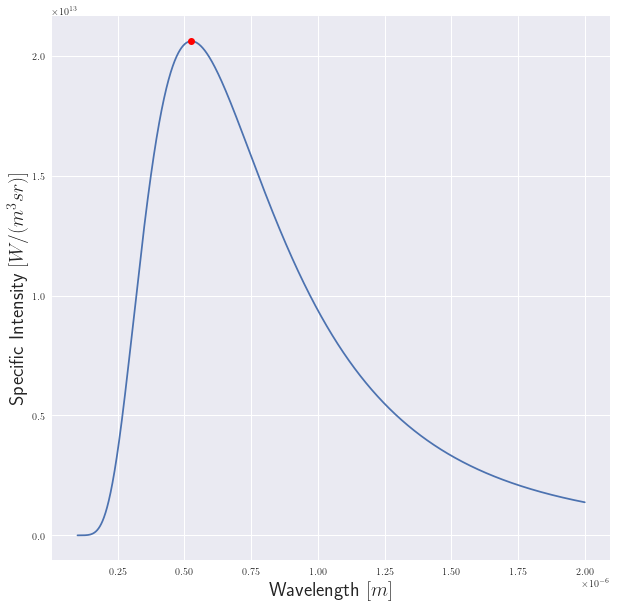

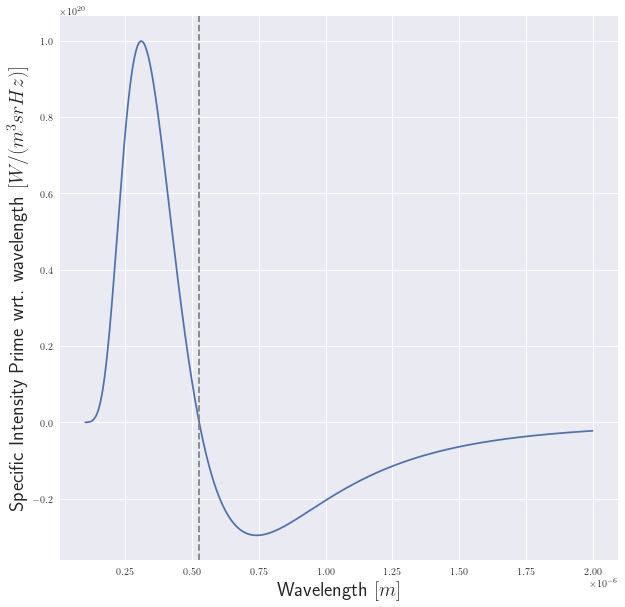

The maximum value for lambda is given by our data/Planck's Law:  5.269999999999982e-07
Wein's law give us a value of: 5.454545454545455e-07


In [727]:
b5500 = BlackBody(5500)
argmax = np.argmax(b5500.lplanck)
lmax = b5500.ls[argmax]
b5500.plotlp()
lpmax = b5500.lplanck[argmax]
plt.plot(lmax, lpmax, "or")
plt.show()

plt.figure(figsize = (10,10))
plt.plot(b5500.ls, b5500.lprime, )
plt.xlabel("Wavelength $[m]$").set(fontsize = 20)
plt.ylabel("Specific Intensity Prime wrt. wavelength $[W / (m^3 sr Hz)]$").set(fontsize = 20)
plt.axvline(lmax, color = "grey", linestyle = "--" )
plt.show()







print("The maximum value for lambda is given by our data/Planck's Law: ", lmax)
print("Wein's law give us a value of:",  b5500.weins())




## Question 2) b)
Similarly as we did in 2a), we use our function to calculate the values for the specific intensity as a function of frequency and plot them over their given range. Once again we find the max value of our data and make sure it it agrees with theory by seeing if it agrees with the root of the derivative. Here we have the placnk function in the frequqency domain.
- $\mathcal{B}_{\nu} = \frac{h \nu^3}{c^2}(e^{\frac{h\nu}{kT}}-1)^{-1}$. 

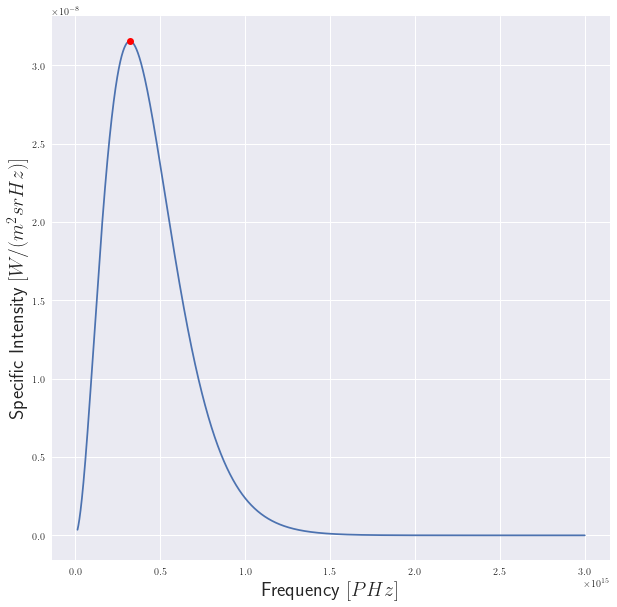

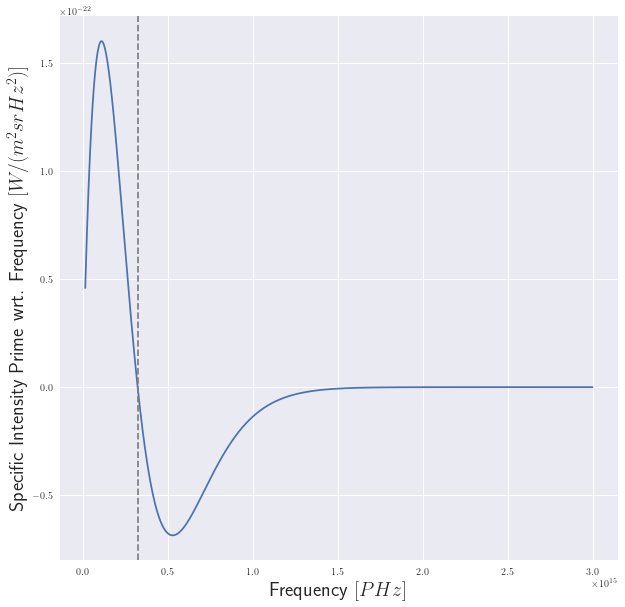

The maximum value for nu is given by our data/Planck's Law:  323000000000000.0
This in wavelength is:  9.281500247678018e-07


In [728]:
b5500.plotnp()
argmax = np.argmax(b5500.nplanck)
nmax = b5500.ns[argmax]
npmax = b5500.nplanck[argmax]
plt.plot(nmax, npmax, "or")
plt.show()


plt.figure(figsize = (10,10))
plt.plot(b5500.ns,b5500.nprime)
plt.xlabel("Frequency $[PHz]$").set(fontsize = 20)
plt.ylabel("Specific Intensity Prime wrt. Frequency $[W / (m^2 sr Hz^2)]$").set(fontsize = 20)
plt.axvline(nmax, color = "grey", linestyle = "--" )
plt.show()
print("The maximum value for nu is given by our data/Planck's Law: ", nmax)
print("This in wavelength is: ", b5500.ntl(nmax))








## Question 2 c)
This is easy to show. A derivation is provided in a seperate PDF

## Question 2 d)
We tried but were not able to finish. Work done is in the same PDF as 2c)

## Question 2 e)
We plot the values asked over the given ranges. 

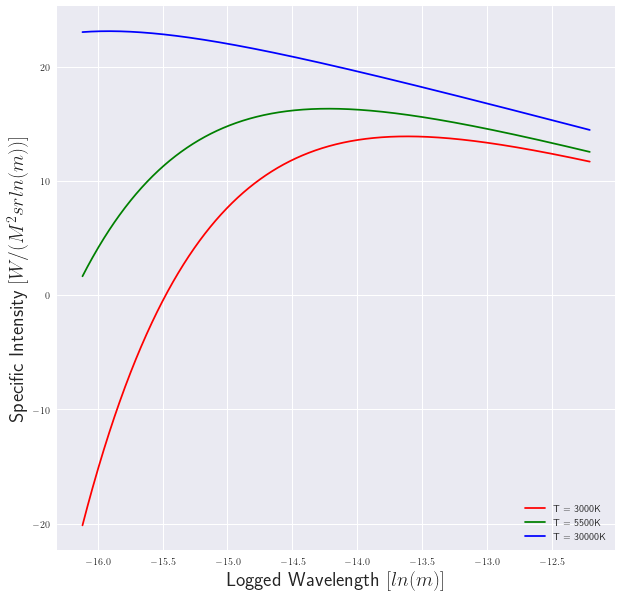

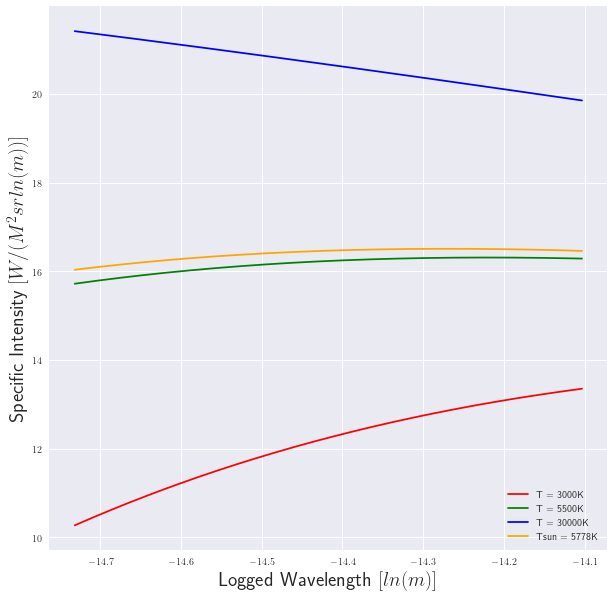

In [729]:
#initate our BB's
b30001 = BlackBody(3000, lrange = (100e-9,5e-6))
b30002 = BlackBody(3000,lrange = (400e-9,750e-9))
b55001 = BlackBody(5500, lrange = (100e-9,5e-6))
b55002 = BlackBody(5500,lrange = (400e-9,750e-9))
b300001 = BlackBody(30000, lrange = (100e-9,5e-6))
b300002 = BlackBody(30000,lrange = (400e-9,750e-9))
bsun = BlackBody(5778, lrange = (400e-9,750e-9))

#plots lots of wavelengths
plt.figure(figsize = (10,10))
b30001.logplot('r', label = 'T = 3000K')
b55001.logplot('g', label = 'T = 5500K')
b300001.logplot('b', label = 'T = 30000K')
plt.xlabel("Logged Wavelength $ [ln(m)] $").set(fontsize = 20)
plt.ylabel("Specific Intensity $ [W / (M^2 sr ln(m))] $").set(fontsize = 20)
plt.legend( loc = 'lower right')

#plots visible
plt.figure(figsize = (10,10))
b30002.logplot('r', label = 'T = 3000K')
b55002.logplot('g', label = 'T = 5500K')
b300002.logplot('b', label = 'T = 30000K')
bsun.logplot('orange', label = 'Tsun = 5778K')
plt.xlabel("Logged Wavelength $ [ln(m)] $").set(fontsize = 20)
plt.ylabel("Specific Intensity $ [W / (M^2 sr ln(m))] $").set(fontsize = 20)
plt.legend(loc = 'lower right')

From our plots over the visible range, a reasonable statement to make it that for T = 3000K $\frac{d log(\lambda \mathcal{B}_{\lambda})}{d\lambda}>0$, for T = 5500K $\frac{d log(\lambda \mathcal{B}_{\lambda})}{d\lambda} \approx 0$ and for T= 30000K $\frac{d log(\lambda \mathcal{B}_{\lambda})}{d\lambda}<0$. We also note that overall $log(\lambda \mathcal{B}_{\lambda}(T=3000)) \ < \ log(\lambda \mathcal{B}_{\lambda}(T=5500)) \ < \ log(\lambda \mathcal{B}_{\lambda}(T=30000))$. Hence, we can see that hotter stars radiate more in the blue part than the red part of the spectrum while cooler stars radiate less in the blue part and more in the red part of the spectrum. Stars near 5500K on the other hand radiate about equal announts of blue and red light. Thus, for a star like our Sun with a surface temperature of 5778K, we expect a fairly uniform distribution for the specific intensity of the sun in the visible spectrum, with slightly more red than blue. Hence we expect stars like the sun to be white with a slightly warm white balance. We also plot $\lambda \mathcal{B}_{\lambda}(Tsun)$ to properly compare and indeed the specific intensity of the sun in the visible range and fairly uniform

## Question \#3 
Here we are asked to find an expression for the fraction of ionized hydrogen as a function of T. We start by stating that the fraction of ionized hydrogen is simply $ f^{II} = \frac{N^{II}}{N^T} $. 
The relations given to us ensure that we conserve charge and nucleons (i.e conservation of charge and mass/energy). Hence, starting with the Saha equation for hydrogen as derived in lectures we have 
$$ f^{II}=\frac{N^{II}}{N^I} = \frac{1}{\eta_e}(\frac{m_eKT 2\pi}{h^2})^{3/2}e^{-\frac{\Chi}{kT}} =\frac{V}{N^{II}}(\frac{m_eKT 2\pi}{h^2})^{3/2}e^{-\frac{\Chi}{kT}}  $$ 

It is also easy to show that 
$$N^T = N^I + N^{II} = N^{I}(1+f^{II})$$

Rearanging we get 
$$N^I = \frac{N^T}{1+f^{II}} $$ 

To ease things in the next portion, let $ f^{II} = \frac{x}{N^{II}}$ where $ x = V (\frac{m_eKT 2\pi}{h^2})^{3/2}e^{-\frac{\Chi}{kT}} $ hence we have 
$$N^I = \frac{N^T}{1+\frac{x}{N^{II}}}$$

Thus, we can substitue this $N^I$ into the Saha equation as a fraction of NII to NI and make it equal to our statement of it as a function of x,  
$$f^{II} = \frac{N^{II}(1+\frac{x}{N^{II}})}{N^T} = \frac{x}{N^{II}} $$

After which we can write $\frac{(N^{II})^2}{N^T} (1+\frac{x}{N^{II}}) = x$ and thus we get 
$$\frac{(N^{II})^2}{N^T} + x\frac{N^{II}}{N^T} - x = 0$$ 

dividing by N^T throughout we get 
$$\frac{N^{II}}{N^T}^2 + \frac{x}{N^T}\frac{N^{II}}{N^T} - \frac{x}{N^T} = 0$$ 

This is exactly the quadratic we were looking for, in other terms $(f^{II})^2+yf^{II} - y = 0$ where $y = \frac{x}{N^T}$. This has 2 roots but we must make sure that one of them is positive and between [0,1] to satisfy the range of values f can take. This behaviour will depend on the behaviour of y. When y is much smaller than 1, we can neglect the constant and linear terms and see that conclude that $f^{II} \approx 0$. y satisfies this condition when T is much smaller than the ionization potential. On the otherhand, in the limit that y is much larger than 1 then we neglect the quadratic term and see that $y \approx 1$ (i.e.  when T is much larger than the ionization potential). When y is exactly 1, then the roots are $\frac{-1 \pm \sqrt{5}}{2} $ or around 0.6. Hence, we have a positive root in each regime of y (since y is strictly positive).


## Question 4 a)
We make a class called RT for the bulk of our computation. For this part, we make a graph of temperature as a function of physical depth. We show the depth where T = Te by calculating a value for tau = 2/3 and plot a red marker for it. It is trivial to show that the surface temperature as a function of effective temperature is then $T = (\frac{1}{2})^{1/4}T_e$. 

<ipython-input-730-6cd03bc0dc57>:33: RuntimeWarning: invalid value encountered in sqrt
  f = lambda b: (-b+np.sqrt(b**2-4*b))/2


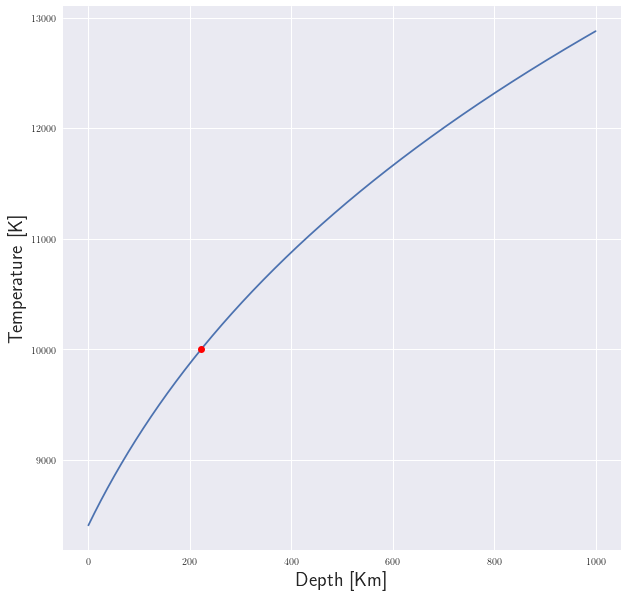

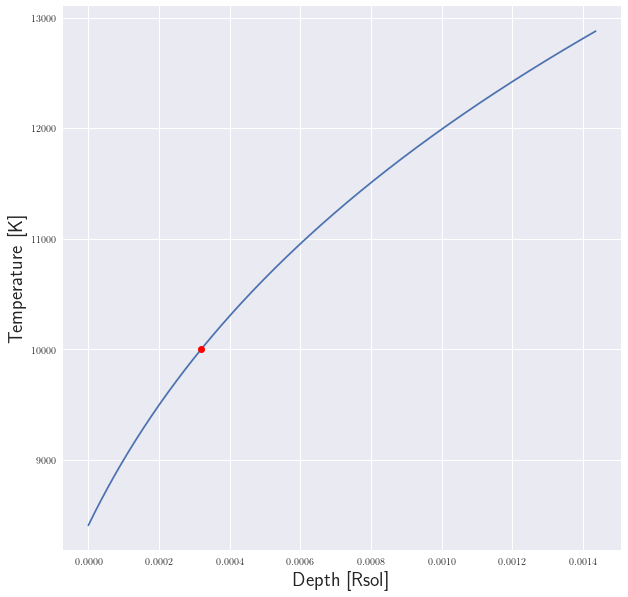

In [730]:
class RT:
    def __init__(self, meanopacity = 3.0, density = 1e-6, Te = 10000):
        #constants
        self.opacity = meanopacity
        self.balmeropacity = 3.5e5
        self.density = density
        self.Te = Te

        #physical and normal optical depth
        srange = (0,1000e3)
        self.sstep = 100
        self.ss = np.arange(srange[0],srange[1]+self.sstep, self.sstep)
        self.od = lambda z : self.density*self.opacity*z
        self.odepth = self.od(self.ss)

        #photosphere surface
        self.zsurface = 2/(3*self.density*self.opacity)

        #calculate temperatures and f2
        self.T = lambda t: self.Te*(3/4*(t+2/3))**(1/4)
        self.Ts = self.T(self.odepth)
        self.f2s = self.f2(self.Ts)


        #tried to integrate for balmer optical depth but issues with Nan's
        cumul = spi.cumulative_trapezoid(self.f2s, self.ss, initial = 600000)
        self.bdepth = self.density*(self.balmeropacity-self.opacity)*cumul+self.density*self.opacity*self.ss
       
        
    #to compute f2
    def f2(self, T):
        b = lambda T: (csnt.proton_mass/self.density)*((2*np.pi*csnt.electron_mass*csnt.k*T)/(csnt.h**2))**(3/2)*np.exp(-1.6e5/T)
        f = lambda b: (-b+np.sqrt(b**2-4*b))/2
        n1n2 = lambda T: 4*np.exp(1.6e5*(1/4-1)/T)

        return n1n2(T)*(1-f(b(T)))

                
    #to plot things
    def plotkm(self, s):
        plt.figure(figsize=(10,10))
        plt.plot(self.ss/1000, s)
        plt.xlabel('Depth [Km]').set_fontsize(20)

    def plotrsol(self, s):
        plt.figure(figsize=(10,10))
        plt.plot(self.ss/696340000, s)
        plt.xlabel('Depth [Rsol]').set_fontsize(20)

star = RT()

star.plotkm(star.Ts)
plt.plot(star.zsurface/1000, star.Te, "or")
plt.ylabel('Temperature [K]').set_fontsize(20)
plt.show()

star.plotrsol( (star.T(star.odepth)))
plt.plot(star.zsurface/696340000, star.Te, "or")

plt.ylabel('Temperature [K]').set_fontsize(20)

## Question 4 b)
We can use equation 5.73 to get the fraction of H atoms in the first excited state. $$ f^2 = \frac{N_2}{N_1} \frac{1}{(1+\frac{N^{II}}{N^I})}$$
and from lectures we know that 
$$\frac{N^2}{N^1} \approx 4e^{\frac{1.6E5 (1/4-1)}{T}}$$

It is also trivial to show that the term involving the saha equation is nothing more than $\frac{N^I}{N^T} $ which is simply 1-f^{II} hence we have $$ f^2 = \frac{N_2}{N_1} (1- f^{II})$$

<Figure size 720x720 with 0 Axes>

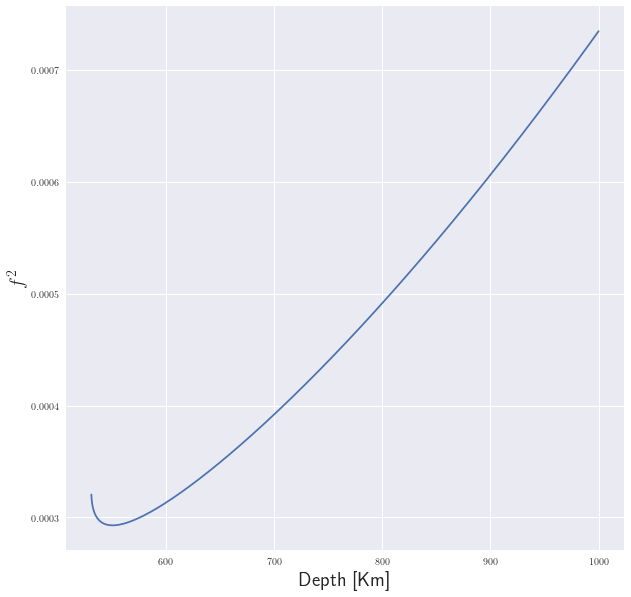

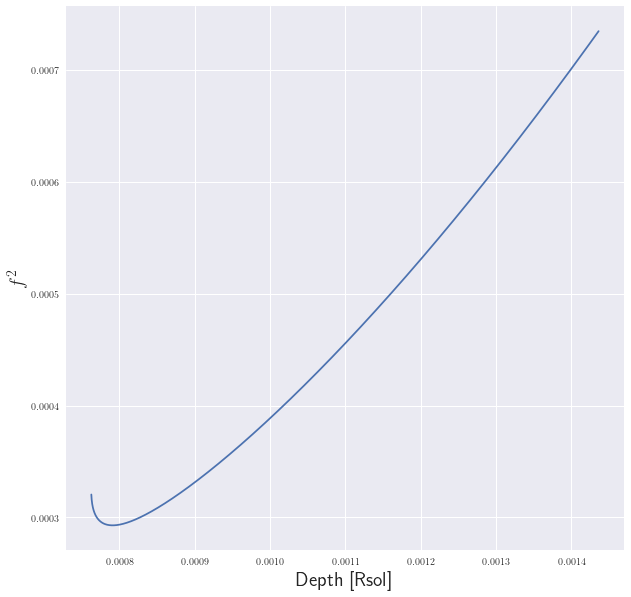

In [731]:
plt.figure(figsize = (10,10))
star.plotkm(star.f2s)
plt.ylabel("$f^2$").set_fontsize(20)
plt.show()

star.plotrsol(star.f2s)
plt.ylabel("$f^2$").set_fontsize(20)
plt.show()


We see that clearly this fraction is higher at higher depths (i.e. at smaller radii, the fraction of hydrogen atoms in the 1st excited state is highest). However, our graph is misleading here since we encountered NaN errors for values near 0 for f2. This means that f2 sharply peaks near the defined surface and thus we expect a high fraction of hydrogen atoms to be in their excited state between 0 and 500km of depth.

## Question 4 c)
We have to be careful how we calculate the optical depth of a balmer photon. Our differential for optical depth is $d\tau = \rho \kappa z$ but here we must properly attribute the opacity to the proper density (i.e. fraction*density) to get $d\tau = f^2 \rho (\kappa_B -\kappa)dz + \rho\kappa dz$ after which we would need to integrate to obtain our optical depth. 


NOTE TO TA: I can't figure out how to get rid of the nan's in my array f2 so not quite sure how I would carry out the integration (i.e. immediatly blows up). Any tips on how to approach that for next time? Especially since I expect us to start solving numerical ODE's fairly soon and I don't want this to happen again. 

[209998.2      nan      nan ...      nan      nan      nan]


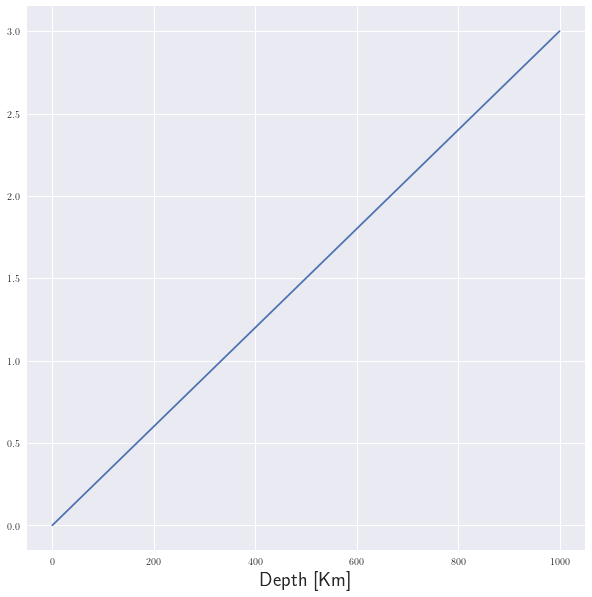

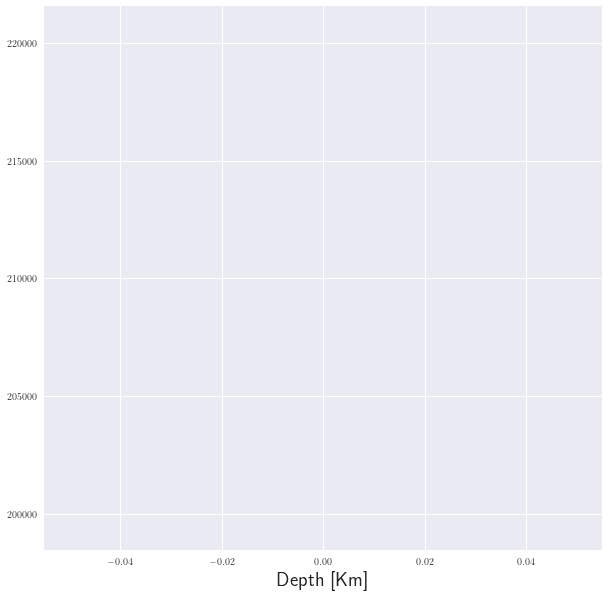

In [732]:
test.plotkm(test.odepth)
test.plotkm(test.bdepth)
print(test.bdepth)

## Question 4 d)

Considering the fact that there is a higher concentration of excited hydrogen atoms near the surface defined in a), we would expect the optical depth to be at a smaller physical depth. From the eddington approximation we have for the temperature, we can see that this would correlate with a lower temperature region and as such we expect balmer lines for this star to be absorption lines. As such we expect the flux from those lines to dip down relative to the continuous flux we would have without emission/absorption lines. How much is harder to evaluate because I wasn't able to get proper values for the balmer optical depth.